In [23]:
import torch
import pandas as pd

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5x')


Using cache found in C:\Users\crist/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-16 Python-3.10.8 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 


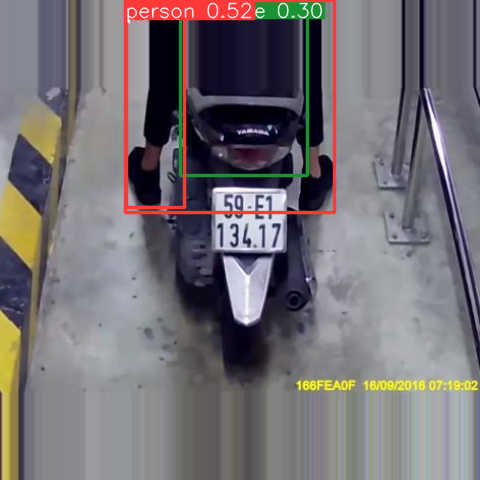

                                            img_path  tag    xmin   ymin  \
0  C:\Users\crist\Repos\TIA_2022/normalized_data/...  0.0  216.96  231.0   
1  C:\Users\crist\Repos\TIA_2022/normalized_data/...  0.0  160.80  244.6   
2  C:\Users\crist\Repos\TIA_2022/normalized_data/...  0.0  168.00  111.0   
3  C:\Users\crist\Repos\TIA_2022/normalized_data/...  0.0  210.00  216.8   
4  C:\Users\crist\Repos\TIA_2022/normalized_data/...  0.0  200.40  302.4   

     xmax    ymax  
0  402.24  277.08  
1  314.40  283.00  
2  363.60  282.60  
3  256.80  237.20  
4  288.00  324.00  


In [29]:
data = pd.read_csv("./normalized_data/unique_plates.csv")
sample = data.sample(1)

paths = sample["img_path"].tolist()

for path in paths:
    results = model(path)
    results.show()

print(data.head())


In [25]:
sample = data.sample(200, random_state=123)

percent = 0.9

train = sample.iloc[:int(len(data)*percent), :]
val = sample.iloc[int(len(data)*percent):, :]


In [34]:
import os


def copy(src_file, dest): return os.system(f"cp {src_file} {dest}")


folder_path = "C:\\Users\\crist\\Repos\\TIA_2022/normalized_data/plates_images/"

for i in train.index:
    path = train["img_path"][i]

    name = path.split('/')[-1]

    copy(path, "./yolo/data/images/train/"+name+".jpg")

    with open("./yolo/data/labels/train/" + name+'.txt', 'w') as f:
        f.write("0 ")
        f.write(str(train["xmin"][i])+" ")
        f.write(str(train["ymin"][i])+" ")
        f.write(str(train["xmax"][i])+" ")
        f.write(str(train["ymax"][i]))

for i in val.index:
    path = val["img_path"][i]

    name = path.split('/')[-1]
    copy(path, "./yolo/data/images/val/"+name+".jpg")

    with open("./yolo/data/labels/val/" + name+'.txt', 'w') as f:
        f.write("0 ")
        f.write(str(val["xmin"][i])+" ")
        f.write(str(val["ymin"][i])+" ")
        f.write(str(val["xmax"][i])+" ")
        f.write(str(val["ymax"][i]))


In [27]:
# python train.py --img 640 --batch 16 --epochs 70 --data coco128.yaml --weights yolov5x.pt --cache
